In [25]:
# importando as bíbliotecas
import pandas as pd
import prince
from scipy.stats import chi2_contingency

In [26]:
df = pd.read_excel('Perfil Aplicação Civil.xlsx')
df

,estudante,perfil,aplicacao,estado_civil
0,Gabriela,Conservador,Poupanca,Casado
1,Luiz Felipe,Conservador,Poupanca,Casado
2,Patrícia,Conservador,Poupanca,Casado
3,Gustavo,Conservador,Poupanca,Solteiro
4,Letícia,Conservador,Poupanca,Casado
...,...,...,...,...
95,Sheila,Agressivo,Acoes,Solteiro
96,Pedro,Agressivo,Acoes,Solteiro
97,Horácio,Agressivo,Acoes,Solteiro
98,Leandro,Agressivo,Acoes,Solteiro


In [27]:
# Tirando colunas que não vão fazer parte do modelo
df = df.drop(columns=['estudante'])
df

,perfil,aplicacao,estado_civil
0,Conservador,Poupanca,Casado
1,Conservador,Poupanca,Casado
2,Conservador,Poupanca,Casado
3,Conservador,Poupanca,Solteiro
4,Conservador,Poupanca,Casado
...,...,...,...
95,Agressivo,Acoes,Solteiro
96,Agressivo,Acoes,Solteiro
97,Agressivo,Acoes,Solteiro
98,Agressivo,Acoes,Solteiro


In [28]:
# Criando e análisando as tabelas de contingência
tabela_mca_1 = pd.crosstab(df['perfil'], df['aplicacao'])
tabela_mca_2 = pd.crosstab(df['perfil'], df['estado_civil'])
tabela_mca_3 = pd.crosstab(df['aplicacao'], df['estado_civil'])

In [29]:
tabela_mca_1

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,36,20,2
Conservador,5,4,8
Moderado,4,16,5


In [30]:
tabela_mca_2

estado_civil,Casado,Solteiro
perfil,,
Agressivo,17,41
Conservador,12,5
Moderado,14,11


In [31]:
tabela_mca_3

estado_civil,Casado,Solteiro
aplicacao,,
Acoes,9,36
CDB,24,16
Poupanca,10,5


In [32]:
# Análisando a significância estatística das associações 
chi2, pvalor, df1 , freq_esp = chi2_contingency(tabela_mca_1)

In [33]:
print('Associação 1')
print(f'estatística qui2: {chi2}') # estat[istica qui2
print(f'p-valor da estatística: {pvalor}') # pvalor da estatística
print(f'graus de liberdade: {df1}\n') # gras de liberdade

Associação 1
estatística qui2: 31.764164976335362
p-valor da estatística: 2.137594051381398e-06
graus de liberdade: 4



In [34]:
chi2, pvalor, df1 , freq_esp = chi2_contingency(tabela_mca_2)

In [35]:
print('Associação 2')
print(f'estatística qui2: {chi2}') # estat[istica qui2
print(f'p-valor da estatística: {pvalor}') # pvalor da estatística
print(f'graus de liberdade: {df1}\n') # gras de liberdade

Associação 2
estatística qui2: 11.437563671904417
p-valor da estatística: 0.0032837085626606414
graus de liberdade: 2



In [36]:
chi2, pvalor, df1 , freq_esp = chi2_contingency(tabela_mca_3)

In [37]:
print('Associação 3')
print(f'estatística qui2: {chi2}') # estat[istica qui2
print(f'p-valor da estatística: {pvalor}') # pvalor da estatística
print(f'graus de liberdade: {df1}\n') # gras de liberdade

Associação 3
estatística qui2: 17.856657146742826
p-valor da estatística: 0.00013257943624182006
graus de liberdade: 2



In [38]:
# Elaborando o MCA
# Utilizando o método da matriz de Burt
mca = prince.MCA()
mca = mca.fit(df)

In [39]:
# Obtendo as coordenadas nas duas dimensões do mapa
print(mca.column_coordinates(df))

                              0         1
perfil_Agressivo      -0.653069 -0.014732
perfil_Conservador     1.129970  1.483614
perfil_Moderado        0.746741 -0.974679
aplicacao_Acoes       -0.831258  0.387515
aplicacao_CDB          0.417184 -0.935143
aplicacao_Poupanca     1.381285  1.331169
estado_civil_Casado    0.843172 -0.131145
estado_civil_Solteiro -0.636077  0.098934


In [43]:
# Coordenada das linhas
mca.row_coordinates(df)

,0,1
0,1.440751,1.354770
1,1.440751,1.354770
2,1.440751,1.354770
3,0.805403,1.470920
4,1.440751,1.354770
...,...,...
95,-0.910729,0.238135
96,-0.910729,0.238135
97,-0.910729,0.238135
98,-0.910729,0.238135


In [41]:
# Obtendo os eigenvalues
print(mca.eigenvalues_)

[0.6023045112620055, 0.4359878227115959]


In [42]:
# Inércia principal total
print(mca.total_inertia_)

1.6666666666666667


In [44]:
# Obtendo a variância
print(mca.explained_inertia_)

[0.36138270675720324, 0.26159269362695753]


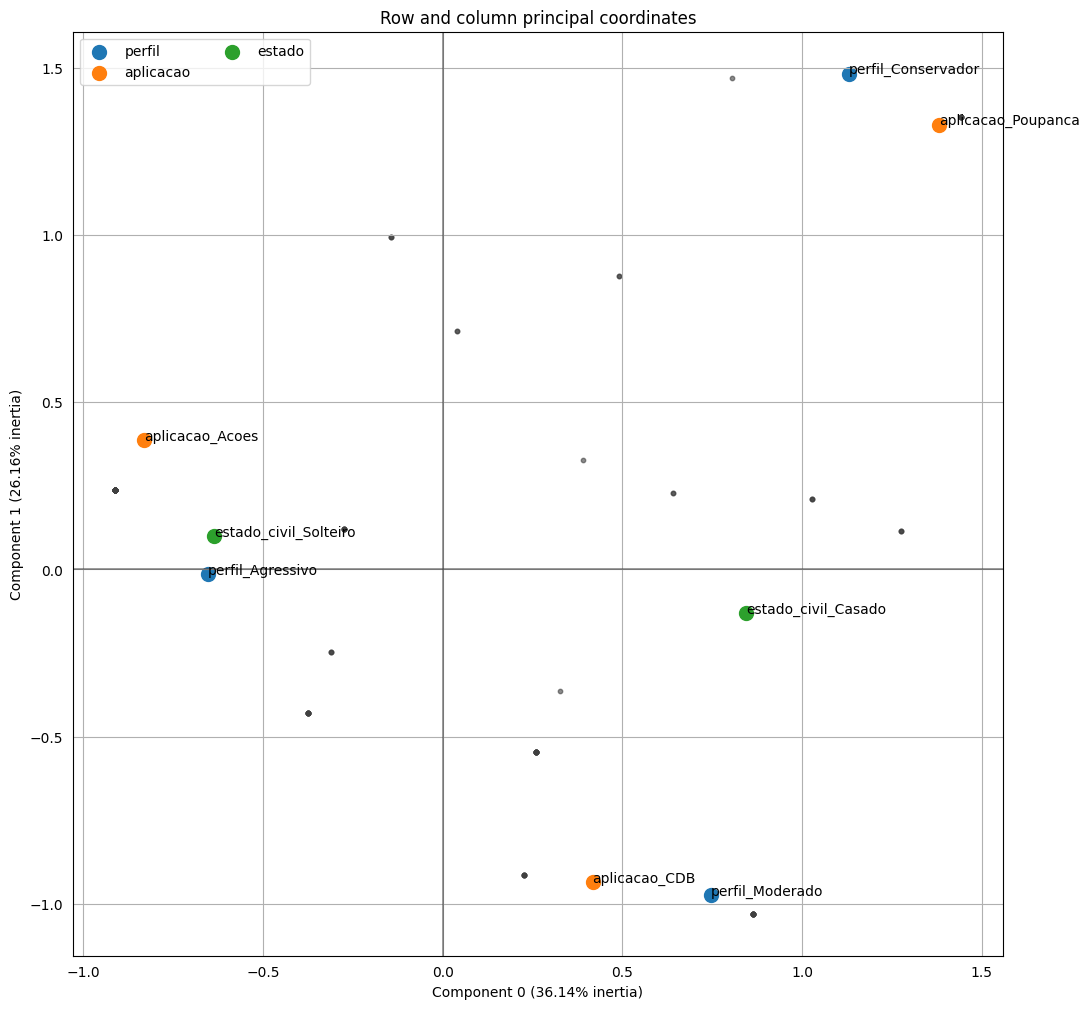

In [47]:
# Plotando o mapa perceptual
mpa_mca = mca.plot_coordinates(
                X = df,
                figsize=(12,12),
                show_row_points=True,
                show_column_points=True,
                show_row_labels=False,
                column_points_size=100,
                show_column_labels=True,
                legend_n_cols=2)